In [1]:
# Scientific computing imports
import itertools
import numpy
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import seaborn; seaborn.set()

from shipnet_randv1 import MultiPlex,ShipNET

In [2]:
# set directory

import os
import glob

os.chdir("C:\Users\colinsh\Documents\compship\Data")
os.listdir("./")

# Using glob to list the output directory
glob.glob("simple_perm_noexc/ship-*")[0:5]

['simple_perm_noexc\\ship-bh7-h1-red2-20150722-0',
 'simple_perm_noexc\\ship-bh7-h1-red2-20150722-1',
 'simple_perm_noexc\\ship-bh7-h1-red2-20150722-10',
 'simple_perm_noexc\\ship-bh7-h1-red2-20150722-100',
 'simple_perm_noexc\\ship-bh7-h1-red2-20150722-101']

In [143]:
all_data = pd.read_csv(os.path.join("warship_perm_comm_mil", "series_all.csv"),index_col=None)
#all_data = pd.read_csv(os.path.join("warship_perm_noexc_fullh_trans", "series_all.csv"),index_col=None)
#type_data = pd.read_csv(os.path.join("simple_perm_noexc", "series_type.csv"),index_col=None)

In [144]:
#all_data=all_data.drop(all_data.columns[[0]],axis=1)
print all_data

     num_bh  height_dc  redundancy  permeability  interactions_total  \
0         4          3           2           0.0        5.056636e+66   
1         4          3           2           0.0        4.318331e+68   
2         4          3           2           0.0        1.738930e+69   
3         4          3           2           0.0        3.457824e+69   
4         4          3           2           0.0        2.207346e+68   
5         4          3           2           0.0        1.725700e+69   
6         4          3           2           0.0        1.213461e+68   
7         4          3           2           0.0        1.087349e+68   
8         4          3           2           0.0        7.009639e+69   
9         4          3           2           0.0        4.347357e+68   
10        4          3           2           0.1        1.381697e+70   
11        4          3           2           0.1        1.617663e+68   
12        4          3           2           0.1        2.212940

In [145]:
ship=ShipNET([8,3,6])
for x in range(2):
    for z in range (4,6):
        for y in range(3):
            ship.remove_ship_node((x,y,z))
for x in range(6,8):
    for z in range (4,6):
        for y in range(3):
            ship.remove_ship_node((x,y,z))
ship.remove_ship_node((0,0,0))
ship.remove_ship_node((0,1,0))
ship.remove_ship_node((0,2,0))

In [18]:
print all_data #[['num_bh','height_dc']]

     num_bh  height_dc  redundancy  permeability  interactions_total  \
0         7          1           2           0.0           269119877   
1         7          1           2           0.0            34060356   
2         7          1           2           0.0           134674003   
3         7          1           2           0.0            17397497   
4         7          1           2           0.0            34014743   
5         7          1           2           0.0            17386691   
6         7          1           2           0.0           268949397   
7         7          1           2           0.0            17655898   
8         7          1           2           0.0           134872022   
9         7          1           2           0.0            67714389   
10        7          1           2           0.1           269163124   
11        7          1           2           0.1            67547097   
12        7          1           2           0.1            3504

In [146]:
nodes=[]
for n in ship.ship.nodes():
    nodes.append(str(n))

edges=[]
for e in ship.ship.edges():
    edges.append(str(e))

In [39]:
node_max=all_data[nodes].max()
ratio_total=all_data.apply(lambda row: row[nodes].max()/row['interactions_total'],axis=1)   
ratio_nodes=all_data.apply(lambda row: row[nodes].max()/row['node_total'],axis=1)   
ratio_edges=all_data.apply(lambda row: row[edges].max()/row['edge_total'],axis=1)   
print ratio_total
print ratio_nodes
print ratio_edges

0     0.997457
1     0.985146
2     0.996612
3     0.964347
4     0.986467
5     0.964946
6     0.998089
7     0.950233
8     0.995149
9     0.991058
10    0.997297
11    0.993512
12    0.957365
13    0.995666
14    0.994937
...
315    0.933487
316    0.936315
317    0.937855
318    0.961482
319    0.924023
320    0.987856
321    0.868096
322    0.995081
323    0.988430
324    0.986739
325    0.980344
326    0.987627
327    0.777161
328    0.931038
329    0.958813
Length: 330, dtype: float64
0     0.997506
1     0.985460
2     0.996713
3     0.964954
4     0.986769
5     0.965516
6     0.998139
7     0.950912
8     0.995250
9     0.991224
10    0.997365
11    0.993682
12    0.957695
13    0.995730
14    0.995080
...
315    0.933690
316    0.936496
317    0.938019
318    0.961652
319    0.924350
320    0.987954
321    0.868473
322    0.995204
323    0.988515
324    0.986886
325    0.980468
326    0.987720
327    0.777614
328    0.931290
329    0.958985
Length: 330, dtype: float64
0     

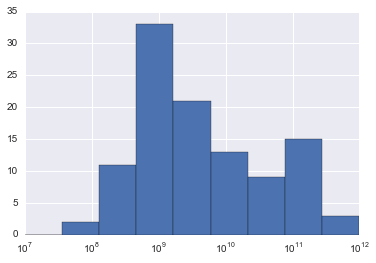

In [96]:
%matplotlib inline

slct_data=[]
for h in range(3,4):
    for r in range(0,11):
        red=r/10.0
        #print h,red
        slct_data.append(list(all_data.loc[(all_data["height_dc"] == h) & (all_data["permeability"]==red),
                                     "interactions_total"]))
slct_data=list(itertools.chain(*slct_data))
#print slct_data
f = plt.figure()
plt.hist(slct_data, bins=numpy.logspace(7.0, 12.0, 10))
plt.gca().set_xscale("log")
#_ = plt.hist(slct_data,bins=numpy.logspace(0, 12,12),color="red",alpha=0.25) #,bins=numpy.logspace(0, 12)

In [97]:
from mpl_toolkits.mplot3d import Axes3D

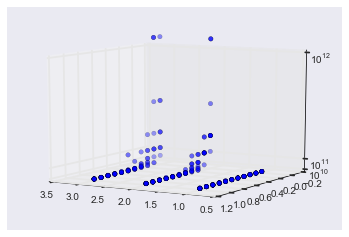

In [131]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(list(all_data['height_dc']),
               list(all_data['permeability']),
               list(all_data['interactions_total']))
ax.set_zscale('log')
ax.set_zlim(10**10,10**12)
ax.view_init(elev=10.,azim=120)
#for ii in xrange(0,360,1):
    #ax.view_init(elev=10., azim=ii)
    #fig.savefig("movie{}.png".format(ii))

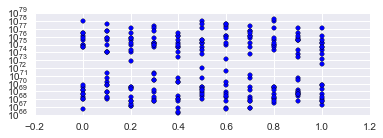

In [147]:
#transitions for fullh_noexc
fig=plt.figure()
ax=fig.add_subplot(2,1,1)
ax.scatter(all_data['permeability'],all_data['interactions_total'])
ax.set_yscale('log')